In [1]:
#importing necessary libraries

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download("stopwords")
nltk.download("omw-1.4")
nltk.download("wordnet")
nltk.download("punkt")
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('C:/ML/python/data/data.csv',delimiter=',')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [3]:
df.isna().sum()
df.duplicated().sum()

6

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.dtypes

Sentence     object
Sentiment    object
dtype: object

<Axes: >

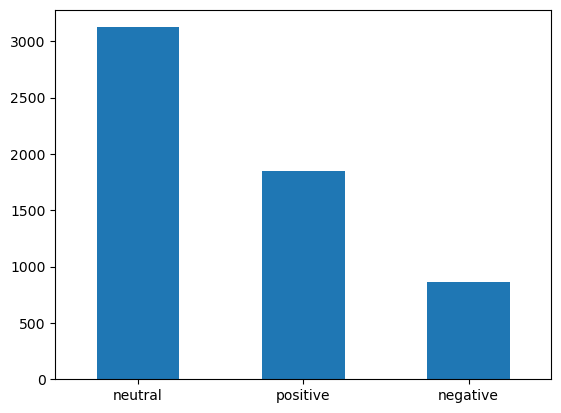

In [6]:
df['Sentiment'].value_counts().plot(kind='bar',rot=0)

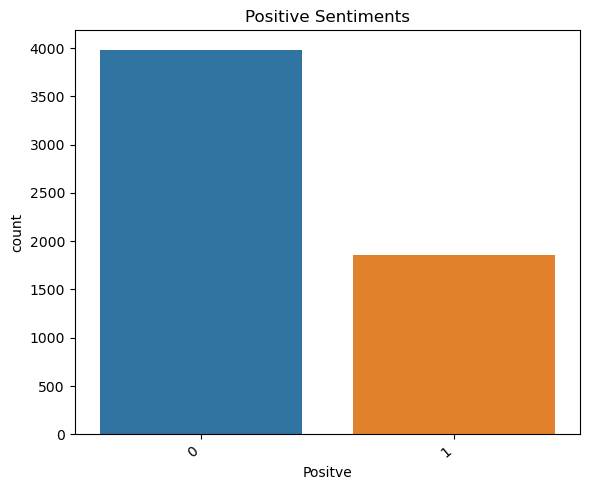

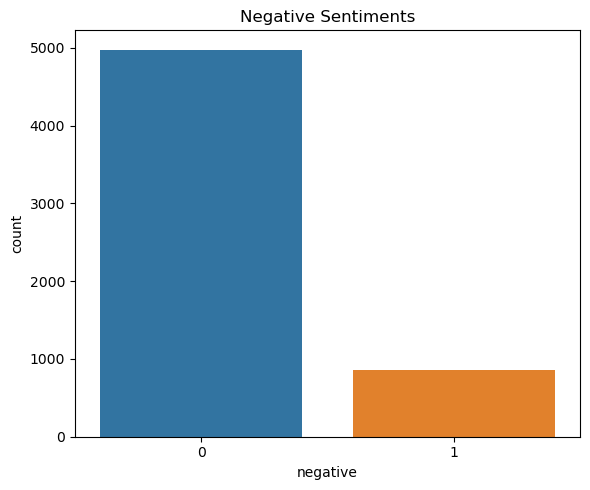

In [7]:
#creating positive and negative variables for sentiments seperately
df['Positve'] = (df['Sentiment'] == "positive").astype('int64')
df['negative'] = (df['Sentiment'] == "negative").astype('int64')


fig, axs = plt.subplots(figsize=(6,5)) 
sns.countplot(x='Positve',data=df,ax=axs)
axs.set_xticklabels(axs.get_xticklabels(),rotation=40,ha="right")
plt.title('Positive Sentiments')
plt.tight_layout()
plt.show()


fig2, axs2 = plt.subplots(figsize=(6,5))
sns.countplot(x='negative',data=df,ax=axs2)
axs.set_xticklabels(axs2.get_xticklabels(), rotation=40, ha="right")
plt.title('Negative Sentiments')
plt.tight_layout()
plt.show()


In [8]:
#creating a new variable in the data frame named "class" for binary target variable used later
#binary classes

df['class'] = (df['Sentiment'] == "positive") |(df['Sentiment'] == "negative")
df['class'] = df['class'].astype("int64")

In [9]:
#making Sentence lower cased

df['Sentence'] = df['Sentence'].str.lower()
print(df['Sentence'])

0       the geosolutions technology will leverage bene...
1       $esi on lows, down $1.50 to $2.50 bk a real po...
2       for the last quarter of 2010 , componenta 's n...
3       according to the finnish-russian chamber of co...
4       the swedish buyout firm has sold its remaining...
                              ...                        
5837    rising costs have forced packaging producer hu...
5838    nordic walking was first used as a summer trai...
5839    according shipping company viking line , the e...
5840    in the building and home improvement trade , s...
5841    helsinki afx - kci konecranes said it has won ...
Name: Sentence, Length: 5836, dtype: object


In [10]:
#removing html_tags




def remove_html_tags(text):
    pattern = r'<.*?>' 
    text = re.sub(pattern, '', text)
    return text


df['Sentence'] = df['Sentence'].apply(remove_html_tags)
print(df['Sentence'])

0       the geosolutions technology will leverage bene...
1       $esi on lows, down $1.50 to $2.50 bk a real po...
2       for the last quarter of 2010 , componenta 's n...
3       according to the finnish-russian chamber of co...
4       the swedish buyout firm has sold its remaining...
                              ...                        
5837    rising costs have forced packaging producer hu...
5838    nordic walking was first used as a summer trai...
5839    according shipping company viking line , the e...
5840    in the building and home improvement trade , s...
5841    helsinki afx - kci konecranes said it has won ...
Name: Sentence, Length: 5836, dtype: object


In [11]:
#removing url tags
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)


df['Sentence'] = df['Sentence'].apply(remove_url)

In [12]:
#removing punctuation
PUNC = string.punctuation

def remove_punct(text):
    return text.translate(str.maketrans("","",PUNC))


df['Sentence'] = df['Sentence'].apply(remove_punct)
print(df['Sentence'])

0       the geosolutions technology will leverage bene...
1       esi on lows down 150 to 250 bk a real possibility
2       for the last quarter of 2010  componenta s net...
3       according to the finnishrussian chamber of com...
4       the swedish buyout firm has sold its remaining...
                              ...                        
5837    rising costs have forced packaging producer hu...
5838    nordic walking was first used as a summer trai...
5839    according shipping company viking line  the eu...
5840    in the building and home improvement trade  sa...
5841    helsinki afx  kci konecranes said it has won a...
Name: Sentence, Length: 5836, dtype: object


In [13]:
#removing numerical punctuation: \d

df['Sentence'] = df['Sentence'].str.replace("\d","")
df['Sentence'] = df['Sentence'].str.replace("[^\w\s]","")
df['Sentence'] = df['Sentence'].str.replace("mn","")
print(df['Sentence'])

0       the geosolutions technology will leverage bene...
1             esi on lows down  to  bk a real possibility
2       for the last quarter of   componenta s net sal...
3       according to the finnishrussian chamber of com...
4       the swedish buyout firm has sold its remaining...
                              ...                        
5837    rising costs have forced packaging producer hu...
5838    nordic walking was first used as a summer trai...
5839    according shipping company viking line  the eu...
5840    in the building and home improvement trade  sa...
5841    helsinki afx  kci konecranes said it has won a...
Name: Sentence, Length: 5836, dtype: object


In [14]:
#removing stopwords
sw = set(stopwords.words("english"))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word.lower() not in sw]
    return " ".join(cleaned_tokens)



df['Sentence'] = df['Sentence'].apply(remove_stopwords)

In [15]:
#applying wordnet lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

df['Sentence'] = df['Sentence'].apply(lemmatize_text)


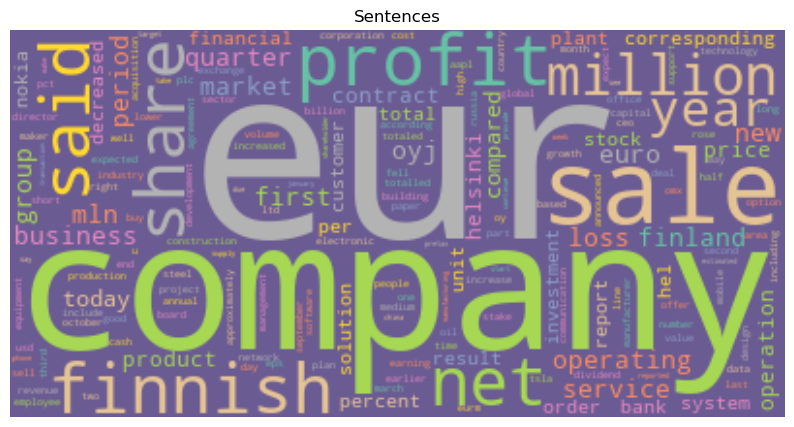

In [18]:
#creating wordcloud to view most frequently used words
text = " ".join(i for i in df['Sentence'])

from wordcloud import WordCloud

wordcloud = WordCloud(
    background_color="#6B5B93",
    colormap="Set2",
    collocations=False).generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Sentences")
plt.show()

In [19]:
#using 'class' as target variable
X = df['Sentence']
y = df['class']
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.15,random_state=42)

In [20]:
#import libraries to create RNN LSTM


from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import LSTM,Embedding, Dense
from keras.utils import pad_sequences

num_words = 10000

In [21]:
#tokenizer and padding from keras
token = Tokenizer(num_words=num_words)
token.fit_on_texts(X_train)

word_index = token.word_index

#to sequences so the text features can be used
X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)

In [22]:
print(X_train[0])

[2933, 2295, 4275, 1910, 20, 199, 2934, 411, 2, 686, 180, 126, 1167, 226]


In [23]:
print(X_train[123])


[860, 4373, 193, 1487, 58, 27, 2336, 17, 3004, 1694, 365, 659, 369, 659, 1000, 1694, 4374]


In [24]:
#max length to determine padding for train/text split

max_len = max([len(x) for x in X_train])
print(max_len)


38


In [25]:
#38 is the max_len used for the train/test split


X_train = pad_sequences(X_train,maxlen=max_len)
X_test = pad_sequences(X_test,maxlen=max_len)

In [29]:
X_train.shape


(4960, 38)

In [30]:
X_test.shape

(876, 38)

In [31]:
#RNN model
RNN = Sequential()
RNN.add(Embedding(len(word_index) + 1,output_dim=max_len,input_length=max_len))
RNN.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
RNN.add(Dense(1, activation='sigmoid'))
RNN.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])



history = RNN.fit(X_train,y_train,epochs=20,batch_size=32,validation_data=(X_test,y_test))


Epoch 1/20
155/155 [==============================] - 4s 19ms/step - loss: 0.6433 - accuracy: 0.6252 - val_loss: 0.5434 - val_accuracy: 0.7226
Epoch 2/20
155/155 [==============================] - 2s 16ms/step - loss: 0.4329 - accuracy: 0.8016 - val_loss: 0.5543 - val_accuracy: 0.7340
Epoch 3/20
155/155 [==============================] - 2s 15ms/step - loss: 0.3291 - accuracy: 0.8476 - val_loss: 0.5874 - val_accuracy: 0.7146
Epoch 4/20
155/155 [==============================] - 2s 14ms/step - loss: 0.2706 - accuracy: 0.8740 - val_loss: 0.6305 - val_accuracy: 0.7329
Epoch 5/20
155/155 [==============================] - 2s 14ms/step - loss: 0.2312 - accuracy: 0.8837 - val_loss: 0.7163 - val_accuracy: 0.7260
Epoch 6/20
155/155 [==============================] - 2s 14ms/step - loss: 0.2067 - accuracy: 0.8897 - val_loss: 0.7944 - val_accuracy: 0.7169
Epoch 7/20
155/155 [==============================] - 2s 14ms/step - loss: 0.1895 - accuracy: 0.8927 - val_loss: 0.8556 - val_accuracy: 0.7203

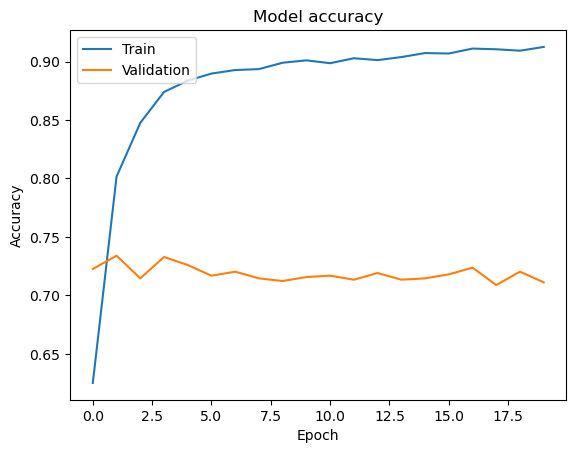

In [32]:
#plotting training results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

